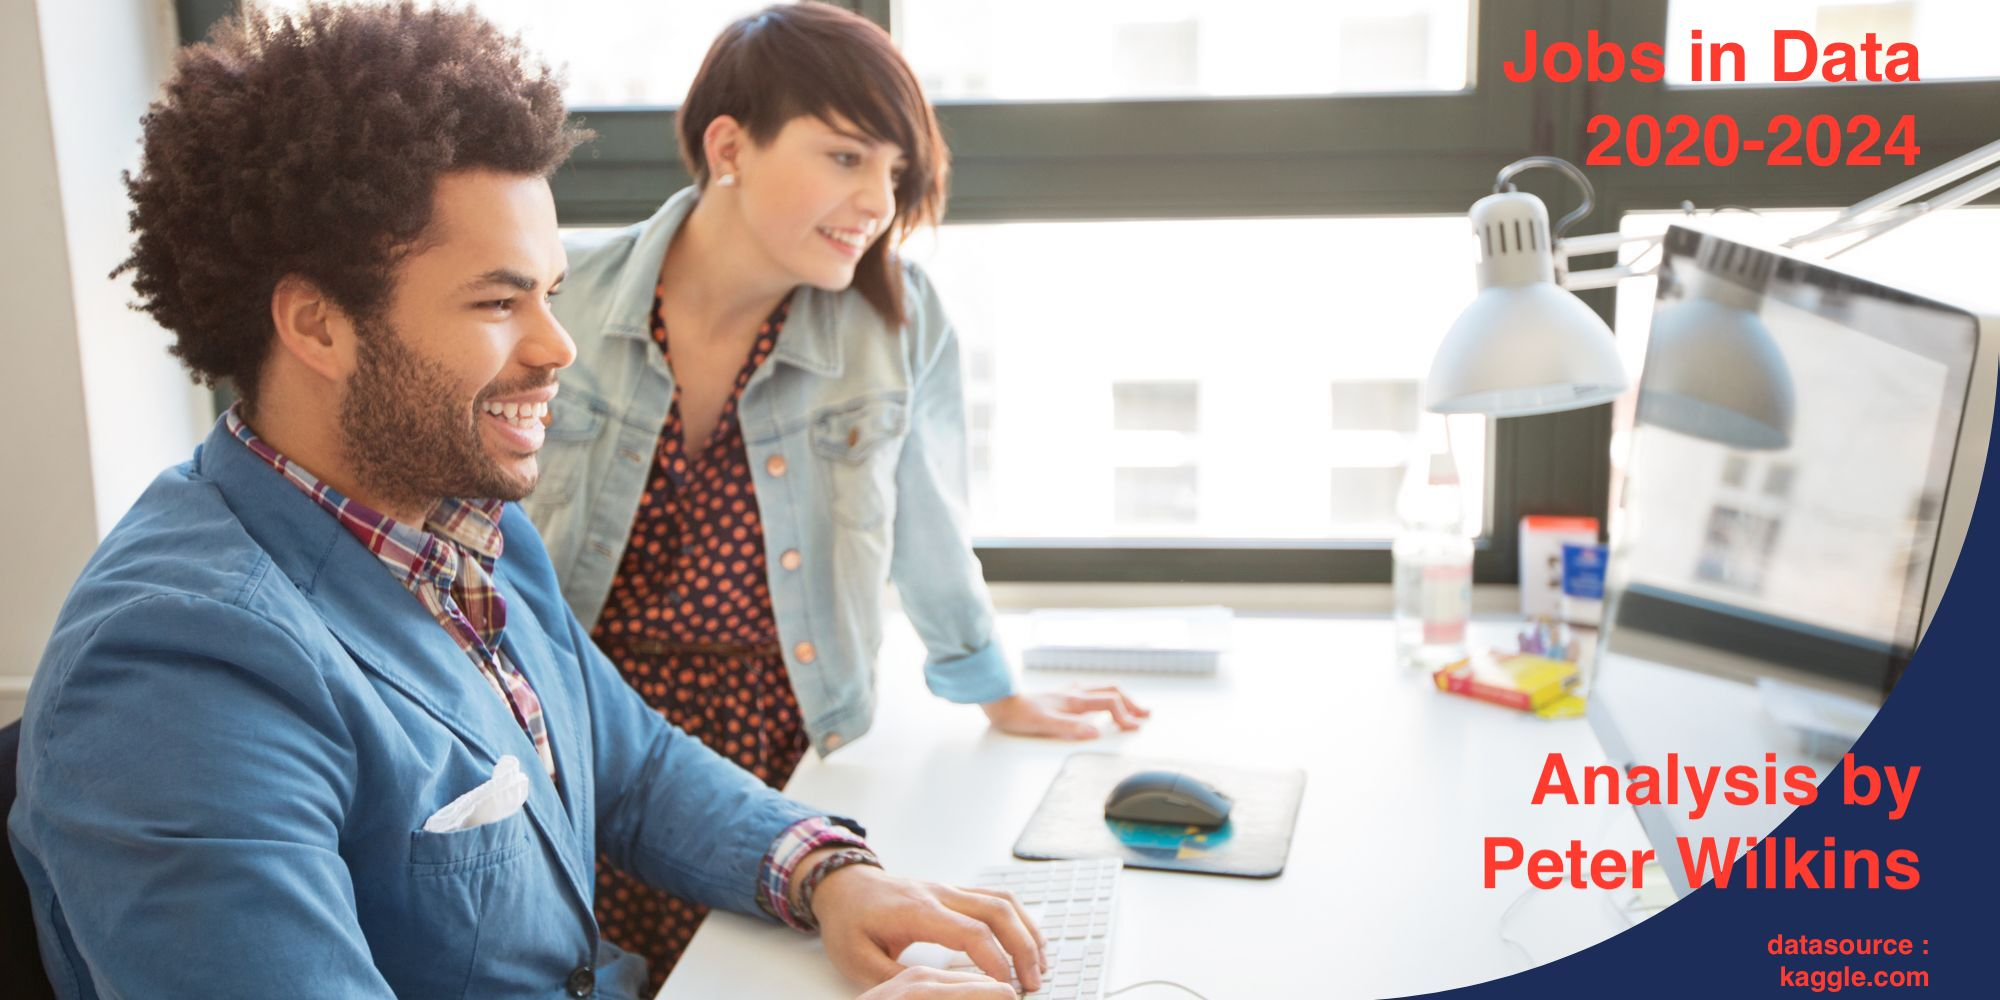


JOBS IN DATA 2020-2024
I downloaded the 'Jobs in Data 2024' dataset from Kaggle.com due to its high usability score, with the intention of exploring the current employment market in data analysis. My primary focus was on the data analysis role, as I am enrolled in the Cambridge Spark Level 4 Data Analyst Government Skills Bootcamp. My main objective was to examine the current state of the UK tech job market for entry-level analyst roles, comparing them with other tech roles and territories, and analyzing how salaries varied across job titles and levels of experience.




Key Questions to be considered :

- What is the mean, median and range of salaries.

- Distribution of salaries.

- Salary comparison across the top three job titles.

- A breakdown of job titles within the Data Analyst role.

- How the Data Analyst role compares with the rest of the Data sector, including salary, experience levels, work setting and locations.

- Finally I am looking for a quick way of calculating salaries across all levels of experience, location and work setting for data analysis roles.


 




In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv('jobs_in_data_2024.csv')

In [10]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


In [12]:
df.describe()


,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


DATA CLEANING.
In keeping with its high usability score the dataset had no NaN values to address over its 14199 rows. However, the presence of diverse entries such as "freelance" and "part-time" in columns like employment_type, alongside a broad spectrum of job titles and experience levels, suggests the likelihood of significant outliers. Detecting and mitigating these outliers is essential for obtaining a more precise understanding of the data jobs industry.

First of all i dropped the salary and salary_currency columns as the salary_in_usd column was an ideal barometer to judge comparative salry trends across all regions

In [20]:
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

In [22]:
df.head()


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


In [24]:
salary_stats = df['salary_in_usd'].describe()
print(salary_stats)


count     14199.00000
mean     149472.04944
std       64379.26016
min       15000.00000
25%      104000.00000
50%      142000.00000
75%      185900.00000
max      450000.00000
Name: salary_in_usd, dtype: float64


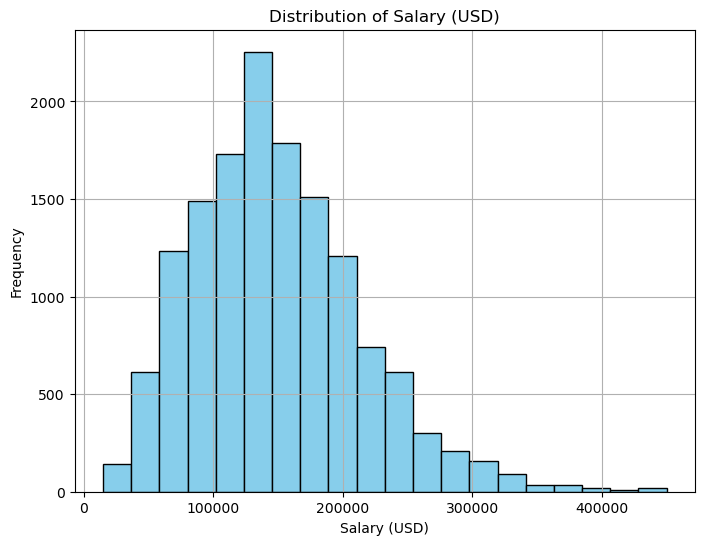

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(df['salary_in_usd'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Salary (USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Upon initial examination of the salary statistics, it became evident that both the minimum and maximum values stood out as significant outliers. Furthermore, a glance at the salary distribution chart revealed that the majority of incomes within the data jobs sector fell within the range of USD 100k to 200k, highlighting a common trend across the industry.

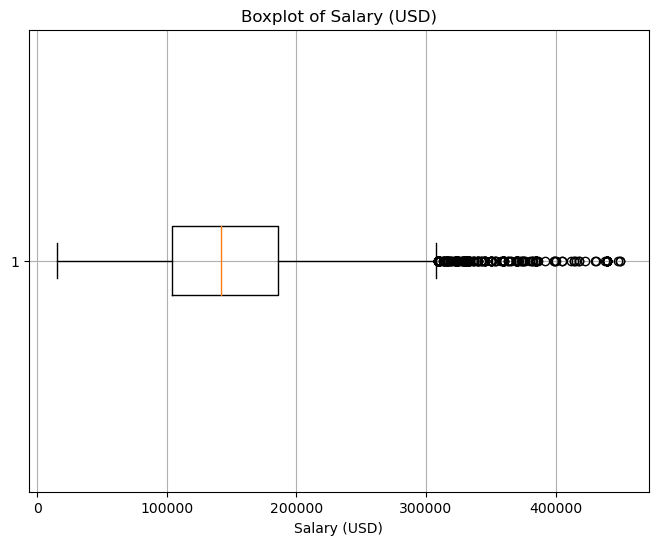

In [29]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['salary_in_usd'], vert=False)
plt.title('Boxplot of Salary (USD)')
plt.xlabel('Salary (USD)')
plt.grid(True)
plt.show()


Calculating the interquartile range (IQR) provided a statistical measure unaffected by outliers, thereby identifying potential outlier roles. Within the expansive Data Science market, roles such as Data/Research Engineer and Data Architect emerged as contributors to the notably high salaries, aligning with expectations given their specialized nature.

In [32]:
Q1 = np.percentile(df['salary_in_usd'], 25)
Q3 = np.percentile(df['salary_in_usd'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
print("Outliers:")
print(outliers)


Outliers:
       work_year experience_level employment_type  \
19          2024           Senior       Full-time   
53          2024           Senior       Full-time   
86          2024           Senior       Full-time   
88          2024           Senior       Full-time   
110         2024        Mid-level       Full-time   
...          ...              ...             ...   
14001       2020        Mid-level       Full-time   
14131       2021        Executive        Contract   
14148       2020        Executive       Full-time   
14192       2021        Mid-level       Full-time   
14195       2020           Senior       Full-time   

                                job_title  salary_in_usd employee_residence  \
19                         Data Scientist         322000      United States   
53                           Data Science         331292      United States   
86                         Data Architect         363000      United States   
88                     Research Scien

To determine the ranking of the Data Analyst role within the job_title column, I conducted an analysis to identify the top roles. This examination aimed to ascertain the relative prominence of Data Analyst among other positions within the dataset.

In [35]:
unique_job_counts = df['job_title'].value_counts()
unique_job_counts

job_title
Data Engineer                    3059
Data Scientist                   2910
Data Analyst                     2120
Machine Learning Engineer        1488
Research Scientist                454
                                 ... 
Data Analytics Associate            1
Analytics Engineering Manager       1
Sales Data Analyst                  1
AWS Data Architect                  1
Consultant Data Engineer            1
Name: count, Length: 149, dtype: int64

Filtering the top three roles for a salary comparison across the four years covered by the data frame revealed distinct trends. The line graph displayed a closely aligned trajectory for the top roles, Data Engineer and Data Scientist, while showcasing a notable contrast for the Data Analyst role. From 2020 to 2022, Data Analyst demonstrated robust growth, followed by a plateau with a slower but discernible downward trend in the last two years. Additionally, all three roles exhibited a wider spread of salaries in the initial years of data collection, transitioning to a trend of increased salary stability over time.

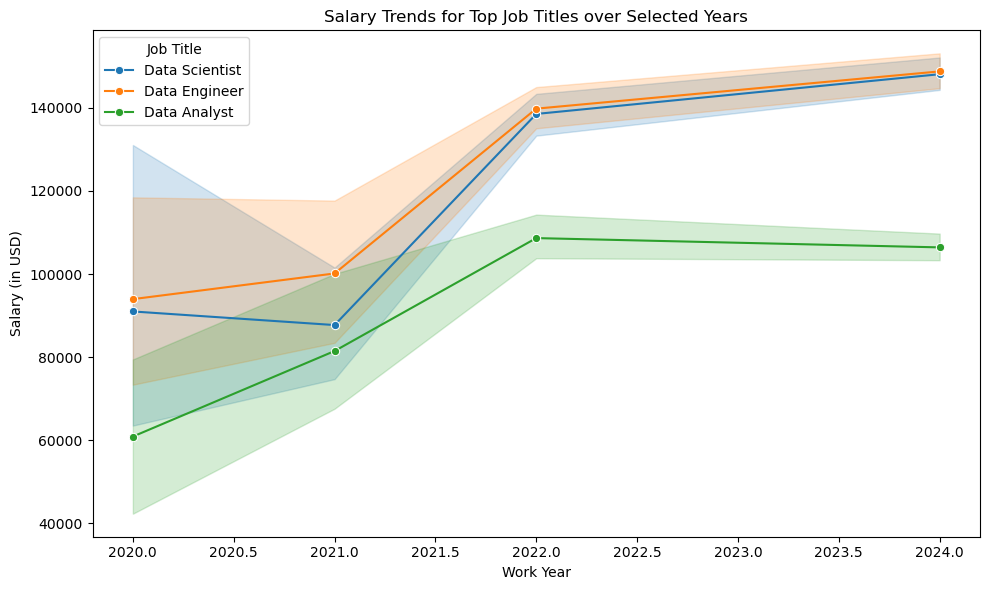

In [38]:
top_job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
selected_years = [2020, 2021, 2022, 2024]
filtered_df = df[df['job_title'].isin(top_job_titles) & df['work_year'].isin(selected_years)]


plt.figure(figsize=(10, 6))
for job_title in top_job_titles:
    sns.lineplot(data=filtered_df[filtered_df['job_title'] == job_title], x='work_year', y='salary_in_usd', marker='o', label=job_title)


plt.title('Salary Trends for Top Job Titles over Selected Years')
plt.xlabel('Work Year')
plt.ylabel('Salary (in USD)')


plt.legend(title='Job Title')
plt.tight_layout()
plt.show()


Now it was time to look deeper into the role i was most interested in (Data Analysis)

In [41]:
analyst_df = df[df['job_title'].str.contains('Analyst', case=False, na=False)]


After applying winsorization, which involved replacing values below the 5th percentile and above the 95th percentile with the corresponding values at those percentiles, I examined the cleaned dataframe. This process aimed to mitigate the impact of potentially problematic outliers and ensure a more robust dataset for further analysis.

In [44]:
lower_percentile = 5
upper_percentile = 95

lower_threshold = np.percentile(analyst_df['salary_in_usd'], lower_percentile)
upper_threshold = np.percentile(analyst_df['salary_in_usd'], upper_percentile)

analyst_df.loc[analyst_df['salary_in_usd'] < lower_threshold, 'salary_in_usd'] = lower_threshold
analyst_df.loc[analyst_df['salary_in_usd'] > upper_threshold, 'salary_in_usd'] = upper_threshold

analyst_df.head()


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
7,2024,Entry-level,Full-time,Insight Analyst,50000,United States,Remote,United States,M,Data Analysis
8,2024,Entry-level,Full-time,Insight Analyst,47500,United States,Remote,United States,M,Data Analysis
13,2024,Entry-level,Full-time,Business Intelligence Analyst,183340,United States,In-person,United States,M,BI and Visualization
14,2024,Entry-level,Full-time,Business Intelligence Analyst,120200,United States,In-person,United States,M,BI and Visualization
29,2024,Senior,Full-time,Data Analyst,115000,United States,In-person,United States,M,Data Analysis


In [46]:
analyst_df.describe()

,work_year,salary_in_usd
count,2531.000000,2531.00000
mean,2023.116950,105970.31529
std,0.690243,38353.61358
min,2020.000000,47500.00000
25%,2023.000000,75000.00000
50%,2023.000000,100000.00000
75%,2024.000000,133300.00000
max,2024.000000,183340.00000


In [48]:
salary_stats = analyst_df.groupby('job_title')['salary_in_usd'].describe()

print("Salary Statistics for Job Titles in analyst_df:")
salary_stats


Salary Statistics for Job Titles in analyst_df:


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Admin & Data Analyst,4.0,51250.000000,5951.190357,47500.0,47500.00,48750.0,52500.00,60000.0
BI Analyst,41.0,118558.902439,38786.509954,47500.0,85000.00,118800.0,147000.00,183340.0
BI Data Analyst,17.0,72282.823529,27516.772422,47500.0,53368.00,60938.0,85000.00,150000.0
Business Data Analyst,19.0,83642.684211,38588.070157,47500.0,49000.00,78000.0,100000.00,180000.0
Business Intelligence Analyst,127.0,110089.330709,40462.601169,47500.0,80252.50,106700.0,132443.50,183340.0
Business Intelligence Data Analyst,2.0,83209.500000,22331.139257,67419.0,75314.25,83209.5,91104.75,99000.0
Compliance Data Analyst,2.0,53750.000000,8838.834765,47500.0,50625.00,53750.0,56875.00,60000.0
Data Analyst,2120.0,107020.840566,37427.198940,47500.0,79000.00,104000.0,134200.00,183340.0
Data Analyst Lead,2.0,86250.000000,54800.775542,47500.0,66875.00,86250.0,105625.00,125000.0


After splitting the dataframe into Analyst and Non-Analyst data roles, I sought to gain insights into where analyst salaries might typically lie. It became apparent that analysis roles often serve as an entry point into the data market, reflecting the initial step for many organizations regardless of size. Consequently, Analyst positions tend to align with entry-level roles. However, once individuals are employed, the Analyst role serves as a foundation for career progression and specialization within data science, ultimately leading to the higher salaries observed in the Non-Analyst boxplot.

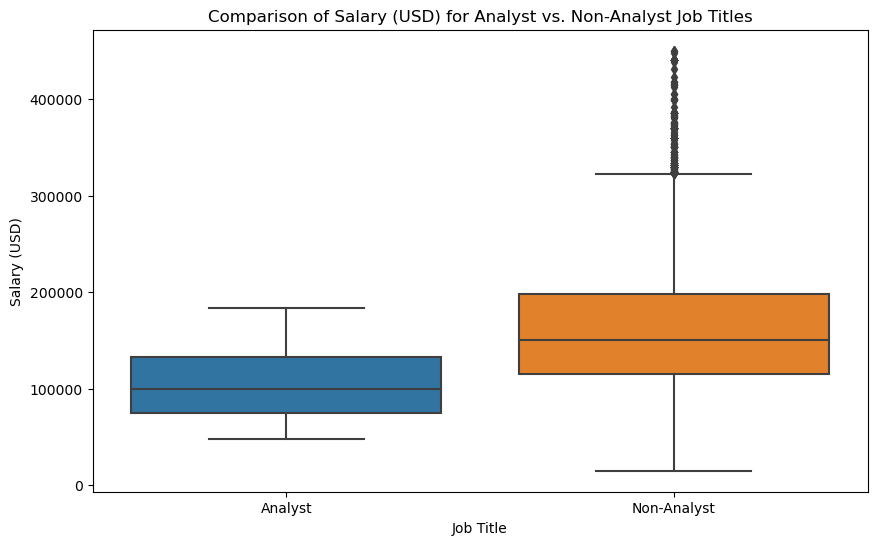

In [51]:
combined_analyst_salary = analyst_df['salary_in_usd']

combined_non_analyst_salary = df[~df['job_title'].str.contains('Analyst')]['salary_in_usd']


combined_df = pd.DataFrame({
    'Job Title': ['Analyst'] * len(combined_analyst_salary) + ['Non-Analyst'] * len(combined_non_analyst_salary),
    'Salary (USD)': pd.concat([combined_analyst_salary, combined_non_analyst_salary])
})


plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Job Title', y='Salary (USD)')
plt.title('Comparison of Salary (USD) for Analyst vs. Non-Analyst Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.show()


This observation was further supported by examining the salary distribution across Analyst and Non-Analyst roles through a bar chart. In the Non-Analyst roles, there existed a wider spread at both the minimum and maximum salary levels. This phenomenon could be attributed to the presence of unspecified general roles in the Non-Analyst dataframe, encompassing the diverse spectrum of the data job market and experience levels.

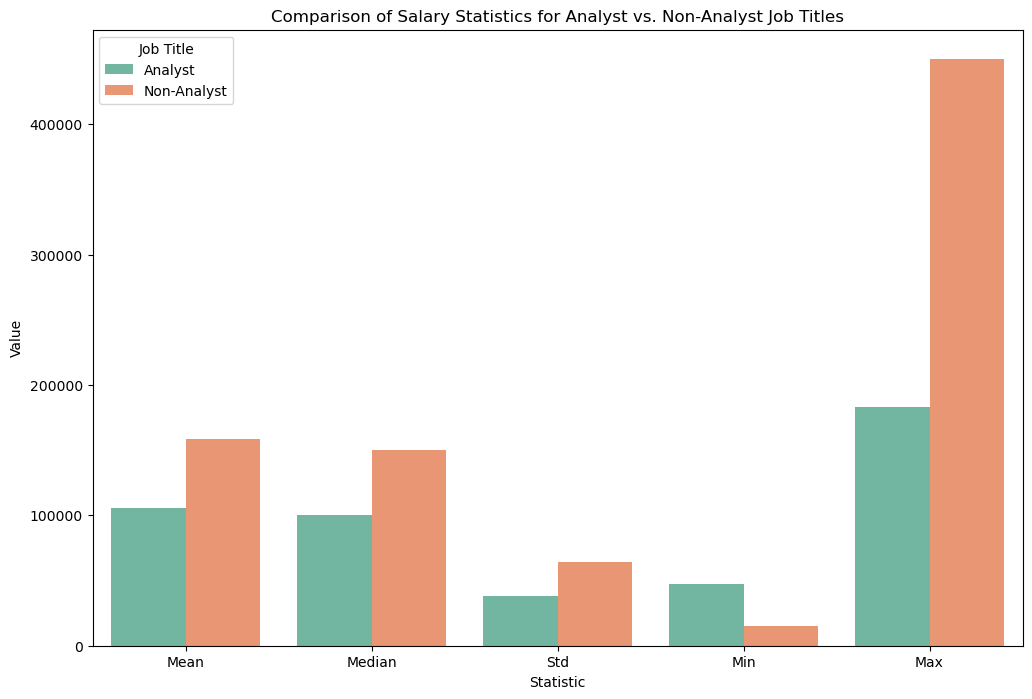

In [56]:
analyst_stats = {
    'Job Title': 'Analyst',
    'Mean': combined_analyst_salary.mean(),
    'Median': combined_analyst_salary.median(),
    'Std': combined_analyst_salary.std(),
    'Min': combined_analyst_salary.min(),
    'Max': combined_analyst_salary.max()
}

non_analyst_stats = {
    'Job Title': 'Non-Analyst',
    'Mean': combined_non_analyst_salary.mean(),
    'Median': combined_non_analyst_salary.median(),
    'Std': combined_non_analyst_salary.std(),
    'Min': combined_non_analyst_salary.min(),
    'Max': combined_non_analyst_salary.max()
}


combined_stats = pd.DataFrame([analyst_stats, non_analyst_stats])


melted_stats = combined_stats.melt(id_vars='Job Title', var_name='Statistic', value_name='Value')

plt.figure(figsize=(12, 8))
sns.barplot(data=melted_stats, x='Statistic', y='Value', hue='Job Title', palette='Set2')
plt.title('Comparison of Salary Statistics for Analyst vs. Non-Analyst Job Titles')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.legend(title='Job Title')
plt.show()


Assuming "Senior" as the highest role possible, I conducted further analysis to explore salary trajectories across different levels within the data sector. While online market searches often interchange "executive" and "senior," the charts provided insights reflecting typical expectations within any job market.

The bar chart for the entire data sector revealed a significant leap from mid-level to higher levels, primarily influenced by the non-analyst sector where salaries tend to exhibit greater fluctuation. In contrast, the analyst sector displayed a smoother trajectory, consistent with its more specialized nature. Here, salaries increase gradually with seniority and experience, reflecting the specific roles within the analyst sector.

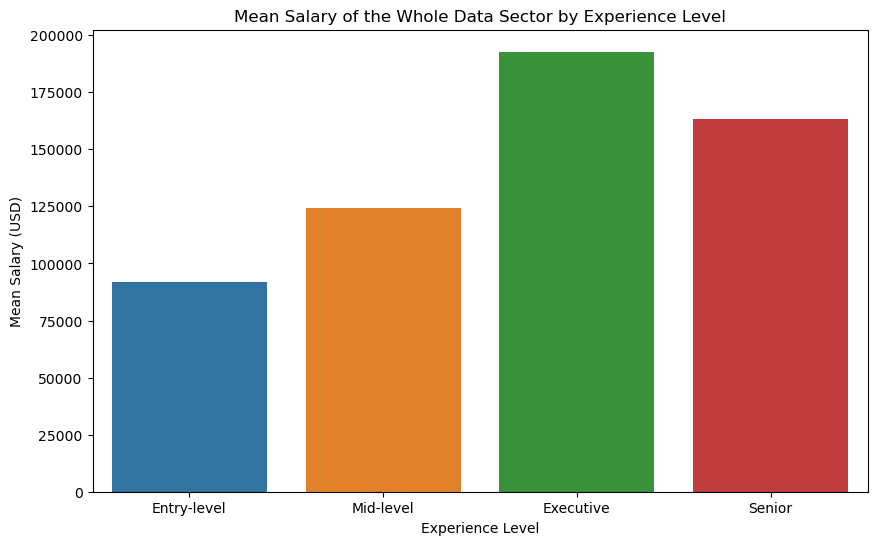

In [58]:
order = ['Entry-level', 'Mid-level', 'Executive', 'Senior']


plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='experience_level', y='salary_in_usd', order=order, estimator=np.mean,errorbar=None)


plt.title('Mean Salary of the Whole Data Sector by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')


plt.show()


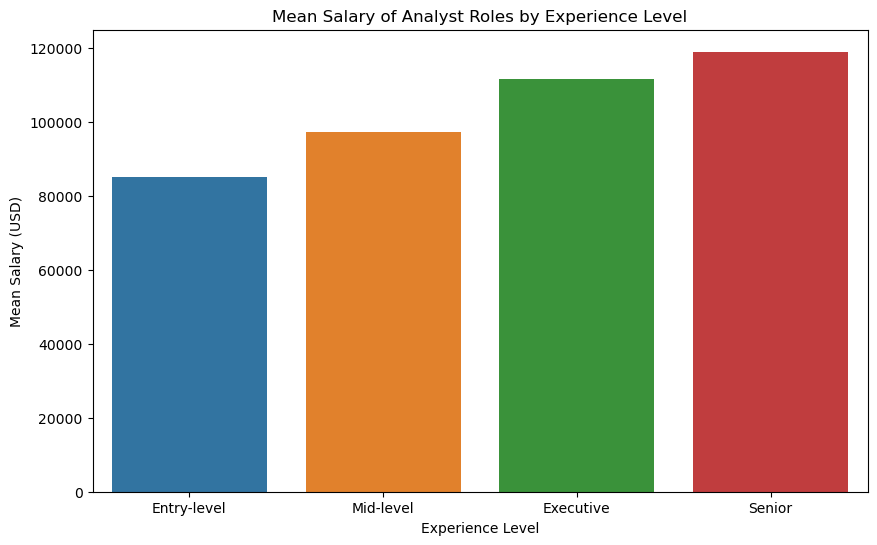

In [60]:
order = ['Entry-level', 'Mid-level', 'Executive', 'Senior']

plt.figure(figsize=(10, 6))
sns.barplot(data=analyst_df, x='experience_level', y='salary_in_usd', order=order, estimator=np.mean,errorbar=None)


plt.title('Mean Salary of Analyst Roles by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')

plt.show()


The following two violin plots compare salary differences based on work settings, first across the entire sector and then specifically for analyst roles. Remarkably similar trends emerge from both charts.

In both cases, roles designated as in-person and remote exhibit nearly identical spreads for salaries and their distribution. Remote roles, however, consistently display lower overall salaries, particularly pronounced in analyst roles, with a wider spread at the lower (entry) levels of pay. This might initially seem surprising until we consider the adaptability of the data job market to remote work and its concurrent demand for specialized skill sets, which can command high salaries from a national or even global talent pool.

The lower remuneration for Hybrid options can be attributed to its attractiveness for workers transitioning from in-person roles pre-pandemic. These individuals may choose to sacrifice a portion of their salary for a more flexible work environment, thus also saving on travel expenses etc. This broader talent base competing for employment could explain the wider spread towards the lower end of salaries, enabling employers to take advantage of the increased availability of skilled professionals.

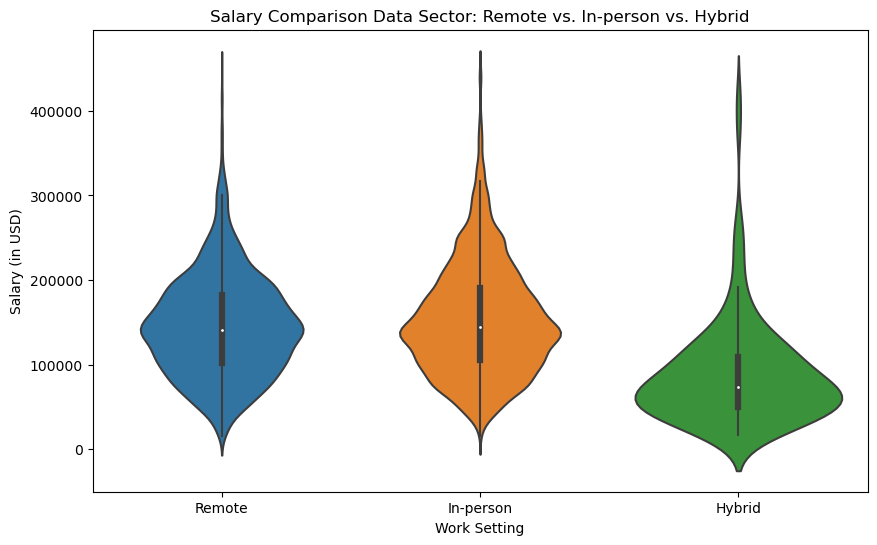

In [63]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='work_setting', y='salary_in_usd', data=df)
plt.title('Salary Comparison Data Sector: Remote vs. In-person vs. Hybrid')
plt.xlabel('Work Setting')
plt.ylabel('Salary (in USD)')
plt.show()


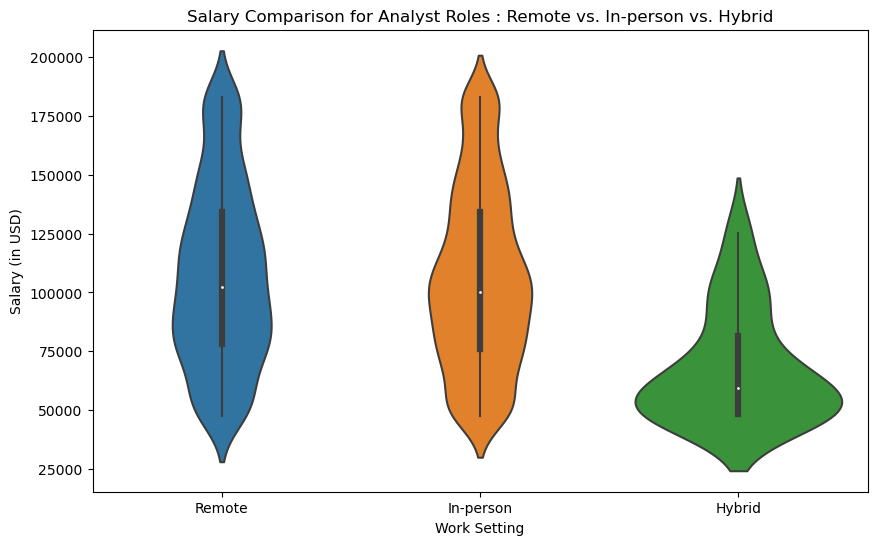

In [65]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='work_setting', y='salary_in_usd', data=analyst_df)
plt.title('Salary Comparison for Analyst Roles : Remote vs. In-person vs. Hybrid')
plt.xlabel('Work Setting')
plt.ylabel('Salary (in USD)')
plt.show()


Despite focusing on the top three countries with the most data, I briefly explored the variation in analyst salaries globally to uncover any unexpected patterns. However, due to insufficient data for most countries, meaningful patterns were not discernible. Nonetheless, it's noteworthy that Australia's data sector appears buoyant, warranting further investigation. Given more time, this stage of analysis would have been opportune to seek additional datasets providing solid information on countries like China, India, and Russia, which boast rapidly growing as well as established data science sectors.

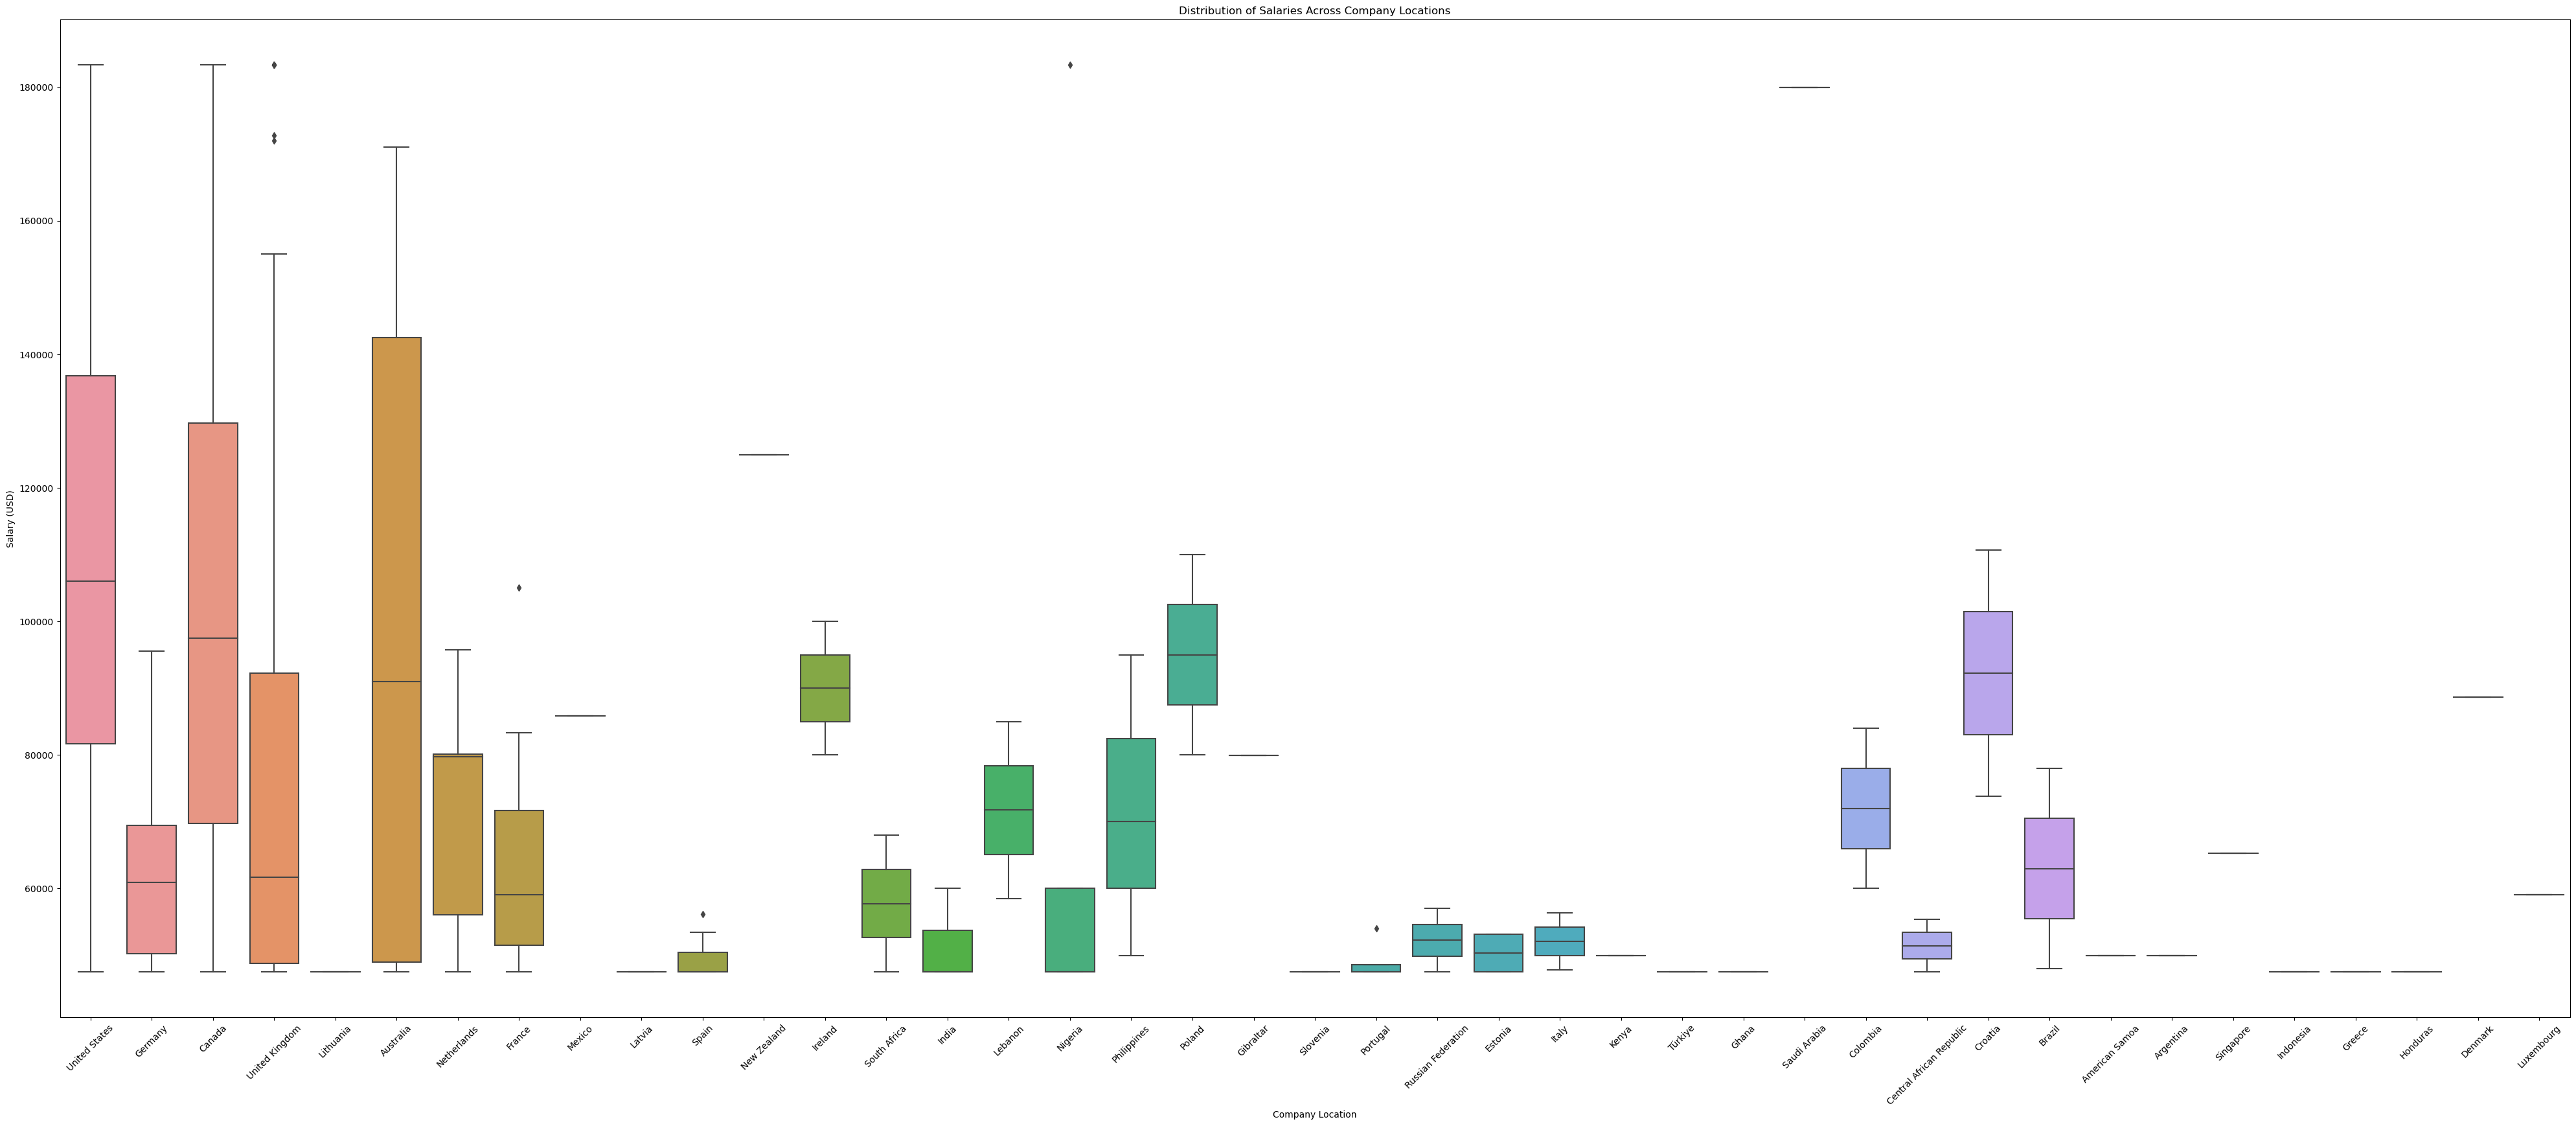

In [68]:
plt.figure(figsize=(50,20))
sns.boxplot(x='company_location', y='salary_in_usd', data=analyst_df)
plt.title('Distribution of Salaries Across Company Locations')
plt.xlabel('Company Location')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

I began by determining the number of analyst roles in each of the top three countries within the dataframe. Subsequently, I created a new column, "job_count," to facilitate comparisons. Then, I generated separate dataframes for each of the top three countries to analyze salaries over the work years.

The salary patterns revealed intriguing insights. While all salaries experienced a decrease in 2024, the UK demonstrated a notably poorer performance compared to the US and Canada during the last year. Despite a marginal dip, the US maintained similar salary levels to 2023, with a robust performance across the full salary range.

In [71]:
top_countries_analyst_roles = analyst_df['company_location'].value_counts().nlargest(3)

print(top_countries_analyst_roles)

company_location
United States     2191
United Kingdom     152
Canada              62
Name: count, dtype: int64


In [73]:
df['job_count'] = df.groupby(['company_location', 'job_title'])['job_title'].transform('count')

df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category,job_count
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research,2
1,2024,Executive,Full-time,Business Intelligence,230000,United States,In-person,United States,M,BI and Visualization,40
2,2024,Executive,Full-time,Business Intelligence,176900,United States,In-person,United States,M,BI and Visualization,40
3,2024,Senior,Full-time,Data Architect,171210,Canada,In-person,Canada,M,Data Architecture and Modeling,10
4,2024,Senior,Full-time,Data Architect,92190,Canada,In-person,Canada,M,Data Architecture and Modeling,10


In [75]:
uk_analyst_df = analyst_df[analyst_df['company_location'].str.contains('United Kingdom', na=False)]

uk_analyst_df.head()



,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
196,2024,Entry-level,Full-time,Data Analyst,47500,United Kingdom,In-person,United Kingdom,M,Data Analysis
197,2024,Entry-level,Full-time,Data Analyst,47500,United Kingdom,In-person,United Kingdom,M,Data Analysis
462,2024,Senior,Full-time,Data Quality Analyst,100000,United Kingdom,In-person,United Kingdom,M,Data Quality and Operations
463,2024,Senior,Full-time,Data Quality Analyst,56250,United Kingdom,In-person,United Kingdom,M,Data Quality and Operations
921,2024,Entry-level,Full-time,Data Analyst,47500,United Kingdom,In-person,United Kingdom,M,Data Analysis


In [77]:
uk_analyst_df.describe()

,work_year,salary_in_usd
count,152.000000,152.000000
mean,2023.105263,74774.684211
std,0.565661,33209.890088
min,2021.000000,47500.000000
25%,2023.000000,48787.000000
50%,2023.000000,61731.000000
75%,2023.000000,92280.000000
max,2024.000000,183340.000000


In [79]:
uk_analyst_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 196 to 14164
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           152 non-null    int64 
 1   experience_level    152 non-null    object
 2   employment_type     152 non-null    object
 3   job_title           152 non-null    object
 4   salary_in_usd       152 non-null    int64 
 5   employee_residence  152 non-null    object
 6   work_setting        152 non-null    object
 7   company_location    152 non-null    object
 8   company_size        152 non-null    object
 9   job_category        152 non-null    object
dtypes: int64(2), object(8)
memory usage: 13.1+ KB


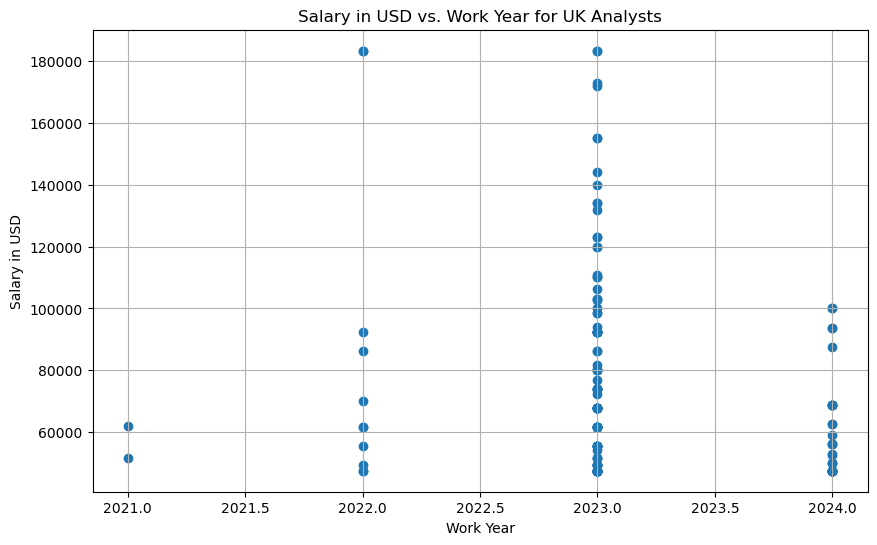

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(uk_analyst_df['work_year'], uk_analyst_df['salary_in_usd'])
plt.title('Salary in USD vs. Work Year for UK Analysts')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()

In [83]:
us_analyst_df = analyst_df[analyst_df['company_location'].str.contains('United States', na=False)]

us_analyst_df.head()



,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
7,2024,Entry-level,Full-time,Insight Analyst,50000,United States,Remote,United States,M,Data Analysis
8,2024,Entry-level,Full-time,Insight Analyst,47500,United States,Remote,United States,M,Data Analysis
13,2024,Entry-level,Full-time,Business Intelligence Analyst,183340,United States,In-person,United States,M,BI and Visualization
14,2024,Entry-level,Full-time,Business Intelligence Analyst,120200,United States,In-person,United States,M,BI and Visualization
29,2024,Senior,Full-time,Data Analyst,115000,United States,In-person,United States,M,Data Analysis


In [85]:
us_analyst_df.describe()

,work_year,salary_in_usd
count,2191.000000,2191.000000
mean,2023.137837,110629.559105
std,0.663591,36736.052151
min,2020.000000,47500.000000
25%,2023.000000,81666.000000
50%,2023.000000,106020.000000
75%,2024.000000,136800.000000
max,2024.000000,183340.000000


In [87]:
us_analyst_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2191 entries, 7 to 14198
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2191 non-null   int64 
 1   experience_level    2191 non-null   object
 2   employment_type     2191 non-null   object
 3   job_title           2191 non-null   object
 4   salary_in_usd       2191 non-null   int64 
 5   employee_residence  2191 non-null   object
 6   work_setting        2191 non-null   object
 7   company_location    2191 non-null   object
 8   company_size        2191 non-null   object
 9   job_category        2191 non-null   object
dtypes: int64(2), object(8)
memory usage: 188.3+ KB


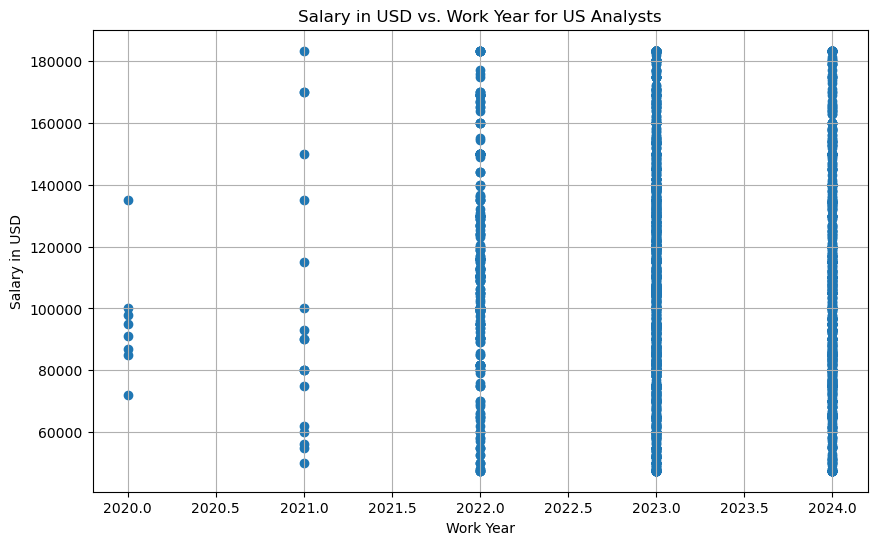

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(us_analyst_df['work_year'], us_analyst_df['salary_in_usd'])
plt.title('Salary in USD vs. Work Year for US Analysts')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()

In [91]:
can_analyst_df = analyst_df[analyst_df['company_location'].str.contains('Canada', na=False)]

can_analyst_df.head()



,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
178,2024,Senior,Full-time,Data Analyst,140000,Canada,In-person,Canada,M,Data Analysis
179,2024,Senior,Full-time,Data Analyst,107000,Canada,In-person,Canada,M,Data Analysis
947,2024,Mid-level,Full-time,Business Intelligence Analyst,142000,Canada,In-person,Canada,M,BI and Visualization
948,2024,Mid-level,Full-time,Business Intelligence Analyst,91300,Canada,In-person,Canada,M,BI and Visualization
1664,2024,Senior,Full-time,Data Analyst,155000,Canada,In-person,Canada,M,Data Analysis


In [93]:
can_analyst_df.describe()

,work_year,salary_in_usd
count,62.000000,62.000000
mean,2023.000000,100360.629032
std,0.940875,36937.455821
min,2020.000000,47500.000000
25%,2023.000000,69796.250000
50%,2023.000000,97500.000000
75%,2024.000000,129750.000000
max,2024.000000,183340.000000


In [95]:
can_analyst_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 178 to 14109
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           62 non-null     int64 
 1   experience_level    62 non-null     object
 2   employment_type     62 non-null     object
 3   job_title           62 non-null     object
 4   salary_in_usd       62 non-null     int64 
 5   employee_residence  62 non-null     object
 6   work_setting        62 non-null     object
 7   company_location    62 non-null     object
 8   company_size        62 non-null     object
 9   job_category        62 non-null     object
dtypes: int64(2), object(8)
memory usage: 5.3+ KB


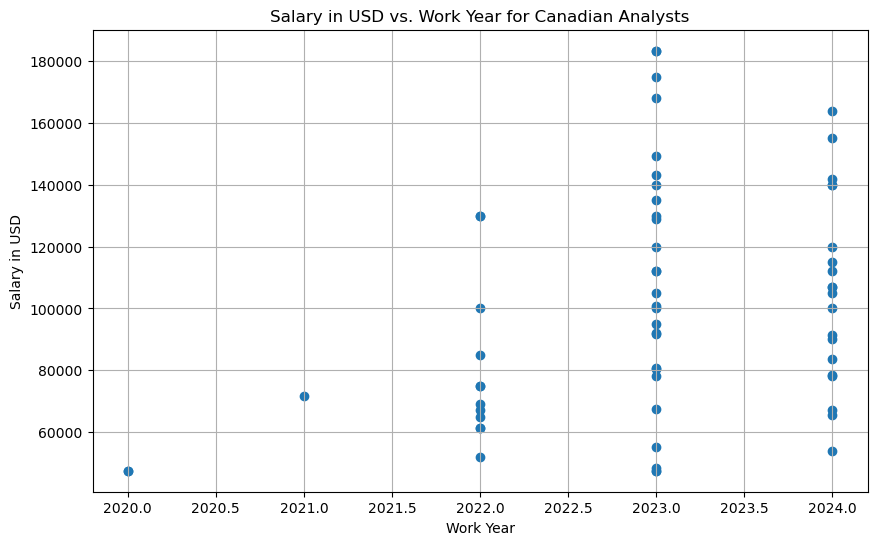

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(can_analyst_df['work_year'], can_analyst_df['salary_in_usd'])
plt.title('Salary in USD vs. Work Year for Canadian Analysts')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()

Below is a line plot comparing the data, illustrating distinct trends in the US, Canadian, and UK analyst job markets.

The US analyst job market appears remarkably stable, with reduced salary variance over time. In contrast, the Canadian market, although starting later, has shown steady growth from 2021 to 2023, operating at a level similar to the more established US market. However, being a younger market, it exhibits higher potential for salary variance.

The UK market began reasonably strongly from 2021 to 2022, with greater salary variance. However, it experienced a decline in the 2022-2023 period, with average salaries dropping approximately 10%. This decline accelerated further in 2023-2024, with a dramatic fall in average salaries. Although salary variance narrowed, indicating a more established market, the overall average salary saw a sharp decrease to almost 2021 levels.

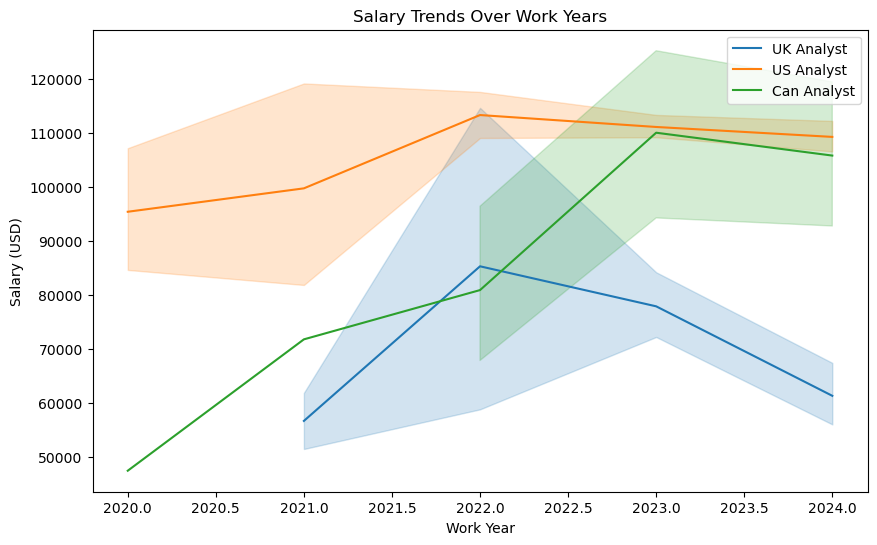

In [100]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=uk_analyst_df, x='work_year', y='salary_in_usd', label='UK Analyst')
sns.lineplot(data=us_analyst_df, x='work_year', y='salary_in_usd', label='US Analyst')
sns.lineplot(data=can_analyst_df, x='work_year', y='salary_in_usd', label='Can Analyst')
plt.title('Salary Trends Over Work Years')
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.legend()
plt.show()


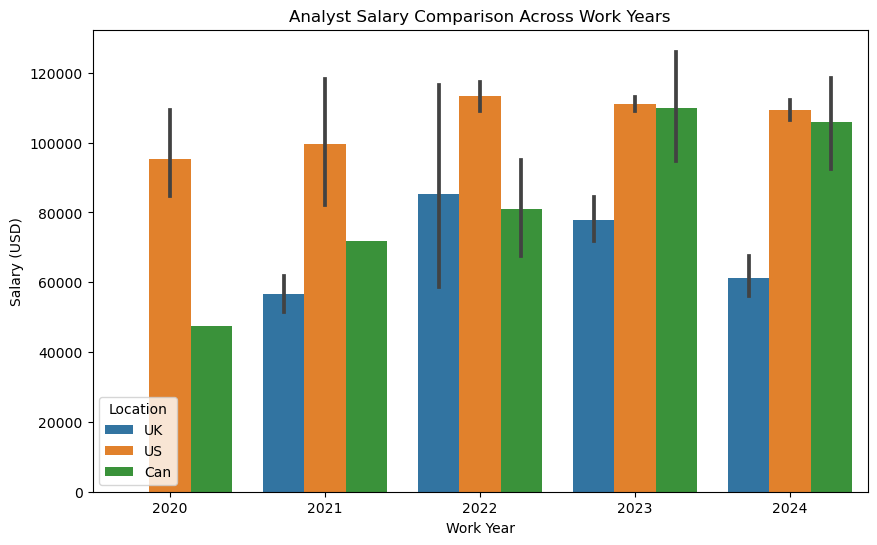

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.concat([uk_analyst_df.assign(location='UK'), us_analyst_df.assign(location='US'), can_analyst_df.assign(location='Can')]),
            x='work_year', y='salary_in_usd', hue='location')
plt.title('Analyst Salary Comparison Across Work Years')
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.legend(title='Location')
plt.show()


Combining the three dataframes for entry-level analyst roles provided insight into the current outlook for candidates entering the data industry. In this sector, salaries appeared more stable across the board. The UK paid less than both the US and Canada, which aligns with expectations considering market size and share. This analysis offers valuable information for individuals gauging entry level salary expectations across different countries.

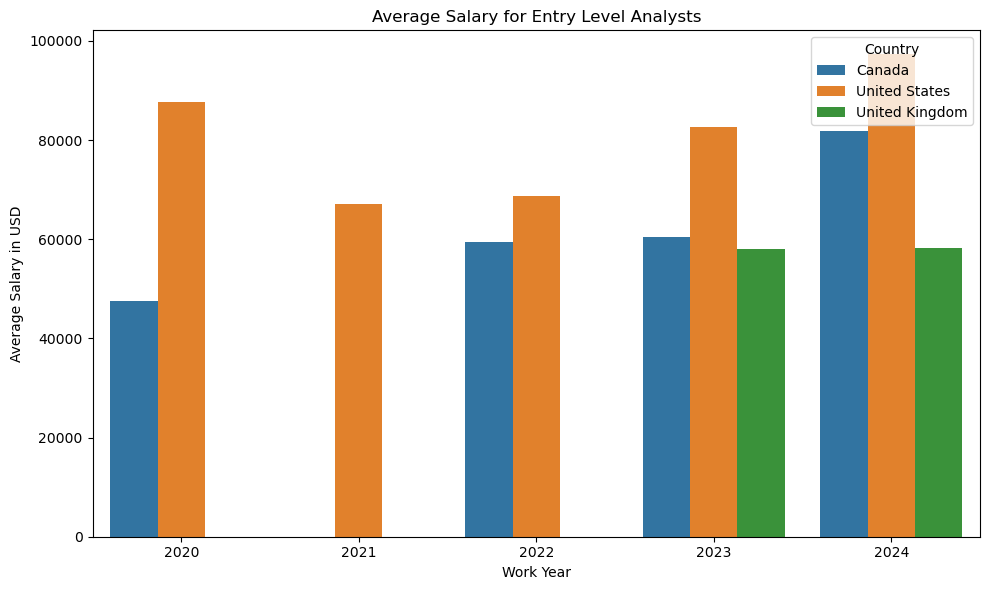

In [102]:
combined_df = pd.concat([uk_analyst_df, us_analyst_df, can_analyst_df])

entry_level_df = combined_df[combined_df['experience_level'] == 'Entry-level']

average_salary_by_year_country = entry_level_df.groupby(['work_year', 'company_location'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_salary_by_year_country, x='work_year', y='salary_in_usd', hue='company_location')
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary for Entry Level Analysts')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


Sorting the highest-paying analyst roles in each of the three territories revealed differences in role titles. However, drawing concrete conclusions based solely on this information proved challenging due to the generality of the terms. For instance, finance might be the primary driver for analysis jobs in the US, while marketing could be predominant in the UK. Yet, it's likely that many of these roles overlap, and without a standardized glossary across territories, interpreting job titles alone might be unwise. Further analysis incorporating additional factors would be necessary to draw more meaningful conclusions about the drivers behind salary discrepancies across different analyst roles and territories.

In [105]:
analyst_roles = df[df['job_title'].str.contains('Analyst', case=False) & df['company_location'].isin(['United Kingdom', 'United States', 'Canada'])]

analyst_salary_mean = analyst_roles.groupby(['job_title', 'company_location'])['salary_in_usd'].mean().reset_index()

highest_paying_roles = analyst_salary_mean.groupby('company_location').apply(lambda x: x.loc[x['salary_in_usd'].idxmax()])

print(highest_paying_roles)


                               job_title company_location  salary_in_usd
company_location                                                        
Canada                      Data Analyst           Canada  107777.511628
United Kingdom    Marketing Data Analyst   United Kingdom  200000.000000
United States       Finance Data Analyst    United States  323905.000000


Finally I though it would be interesting to provide a calculator for analyst roles that could return an average salary when tasked across the company location, work setting and experience level. I did this for all locations just to add more context.

In [121]:

def calculate_average_salary(df, company_location, work_setting, experience_level):
    filtered_df = df[(df['company_location'] == company_location) & 
                     (df['work_setting'] == work_setting) & 
                     (df['experience_level'] == experience_level)]
    avg_salary = filtered_df['salary_in_usd'].mean()
    return avg_salary


In [123]:
company_location_dropdown = widgets.Dropdown(
    options=analyst_df['company_location'].unique(),
    description='Company Location:'
)
work_setting_dropdown = widgets.Dropdown(
    options=analyst_df['work_setting'].unique(),
    description='Work Setting:'
)
experience_level_dropdown = widgets.Dropdown(
    options=analyst_df['experience_level'].unique(),
    description='Experience Level:'
)


output = widgets.Output()


def calculate_and_display_average_salary(b):
    with output:
        output.clear_output()
        avg_salary = calculate_average_salary(analyst_df, company_location_dropdown.value, 
                                              work_setting_dropdown.value, 
                                              experience_level_dropdown.value)
        print(f"Average salary: ${avg_salary:.2f}")


calculate_button = widgets.Button(description="Calculate")
calculate_button.on_click(calculate_and_display_average_salary)


title_widget = widgets.Label(value="Average Salary Calculator", layout=widgets.Layout(width='auto'))


input_widgets = widgets.VBox([title_widget, company_location_dropdown, work_setting_dropdown, experience_level_dropdown, calculate_button])
output_widget = widgets.VBox([output])


display(widgets.HBox([input_widgets, output_widget]))


IN SUMMARY

Analyzing the top three countries (US, Canada, and the UK) reveals that analyst roles in the US and Canada command significantly higher pay, which can be attributed to factors such as cost of living, greater market demand fueled by larger economies, and a culture that fosters startups. For instance, between 2020 and 2023, the UK had around 800,000 startups compared to 5.5 million in the US (source: census.gov). Many of these startups heavily rely on the tech industry, particularly data analysis, for innovation and business insights.

In 2023, the average professional salaries across the top three territories were as follows: US = $77,463, Canada = $59,050, and the UK = $53,985 (source: UNECE - United Nations Economic Commission for Europe). However, the average entry-level in-person rate for data analyst roles was higher: US = $95,287, Canada = $68,850.50, and the UK = $58,879. This indicates that despite the US and Canada being more attractive territories in terms of salary, the UK still demonstrates an above-average data science job market.

The recent downturn in the UK, as shown in the analysis, could be attributed to various factors, including challenges related to Brexit such as restricted access to financial information from Europe and increased regulatory considerations. However, notwithstanding these challenges, the overall study confirms the consensus that data is becoming increasingly important and valuable every year. Analysis across all levels will be essential for every industry to maximize efficiency in an increasingly competitive and challenging landscape.